In [1]:
from matplotlib import pyplot as plt
import numpy as np
class daisy():
    """
    Creates the attributes needed within a daisy.
    Creates the methods needed for daisy growth.
    
    Attributes:
        CONSTANTS
        self.D = death rate
        self.ALB = albedo
        slef.INSUL = insulation constant
        self.temp = tempaerature
        self.growth = growth
        
        VARIABLES
        self.cov = coverage
        self.cov_lst = list of daisy coverage for plotting
    
    Methods:
        d_temp: calculates and updates the daisies collective temperature
        growth_r: calculates and updates the growth of daisies
        d_cov: calculates the rate of growth of daisies
    """
    def __init__(self, color, cov):
        self.D = 0.3
        self.ALB = 0.75 if color == 'w' else 0.25
        self.INSUL = 0.2
        self.temp = 0 #TEMPORARY
        self.growth = 0 #TEMPORARY
        self.cov = cov
        self.cov_lst = []
        
    def d_temp(self, lumin, INSOL, SB, p_alb, p_temp4):
        self.temp = ((self.INSUL * lumin) * \
        (INSOL/SB) * (p_alb - self.ALB) + p_temp4) ** (1/4)
        
    def growth_r(self):
        self.growth = 1 - 0.003265 * ((295.65 - self.temp)**2)
    
    def d_cov(self, g_cov, dt):
        return (self.cov * ((g_cov*self.growth) - self.D)) * dt

In [30]:
class world():
    """
    Creates the attributes needed within the world.
    Creates the methods needed to simulate daisyworld.
    
    Attributes:
        CONSTANTS
        self.INSOL = insolation constant
        self.SB = stefan boltzmann constant
        self.ALB = albedo
        self.p_alb = planet's albedo
        self.temp4 = planet's temperature ** 4
        self.temp_lst = list of planet's temperature for plotting
        
        VARIABLES
        self.t = time
        self.dt = time step
        self.cov = coverage
        self.t_lst = For plotting
        self.bdaisy = black daisies
        self.wdaisy = white daisies
        self.lumin = luminosity
        self.static = checks for luminosity
        
    Methods:
        ground_gov: calculates and updates the ground coverage
        alb: calculates and updates planet's albedo
        p_temp: calculates and updates the planet's temperature. Takes in argument luminosity.
        
        
    """
    def __init__(self, t, dt, b_daisy, w_daisy, static):
        self.INSOL = 917
        self.SB = 5.670367*1e-8
        self.ALB = 0.5
        self.p_alb = 0 #TEMPORARY
        self.temp4 = 22.5+273.15 #TEMPORARY
        self.temp_lst = []
        self.lumin = 1 if static == 'yes' else list(np.linspace(int(t/dt)) #[::-1]
        self.static = True if static == 'yes' else False
        
        self.t = t
        self.dt = dt
        self.cov = 0 #TEMPORARY
        self.t_lst = (np.linspace(0,t,int(t/dt)))
        self.bdaisy = bdaisy
        self.wdaisy = wdaisy
        
    def ground_cov(self):
        self.cov = 1 - self.bdaisy.cov - self.wdaisy.cov
    
    def alb(self):
        self.p_alb = (self.bdaisy.cov * self.bdaisy.ALB) + \
        (self.wdaisy.cov * self.wdaisy.ALB) + \
        (self.cov * self.ALB)
        
    def p_temp(self, lumin):
        self.temp4 = lumin * ((self.INSOL/self.SB) * (1 - self.p_alb))
    
    def equil_state(self, lumin):
        for i in range(len(self.t_lst)):
            self.ground_cov()
            self.alb()
            self.p_temp(lumin)
            self.bdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
            self.wdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
            self.bdaisy.growth_r()
            self.wdaisy.growth_r()
            self.bdaisy.cov += self.bdaisy.d_cov(self.cov, self.dt)
            self.wdaisy.cov += self.wdaisy.d_cov(self.cov, self.dt)
            
            #Checking for negative daisies
            if self.bdaisy.cov < 0.01:
                self.bdaisy.cov = 0.01 
            if self.wdaisy.cov < 0.01:
                self.wdaisy.cov = 0.01
        return ((self.temp4 ** (1/4)-273.15), self.bdaisy.cov, self.wdaisy.cov)
        
    def run(self):
        if type(self.lumin) == int:
            lumin = self.lumin
            for i in range(len(self.t_lst)):
                self.ground_cov()
                self.alb()
                self.p_temp(lumin)
                self.bdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
                self.wdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
                self.bdaisy.growth_r()
                self.wdaisy.growth_r()
                self.bdaisy.cov += self.bdaisy.d_cov(self.cov, self.dt)
                self.wdaisy.cov += self.wdaisy.d_cov(self.cov, self.dt)
            
                #Checking for negative daisies
                if self.bdaisy.cov < 0.01:
                    self.bdaisy.cov = 0.01 
                if self.wdaisy.cov < 0.01:
                    self.wdaisy.cov = 0.01 
            
                #Data storing
                self.temp_lst.append(((self.temp4 ** (1/4)-273.15)))
                self.bdaisy.cov_lst.append(self.bdaisy.cov)
                self.wdaisy.cov_lst.append(self.wdaisy.cov)

        else:
            for lumin in self.lumin:
                self.equil_state(lumin)
                self.temp_lst.append(((self.temp4 ** (1/4)-273.15)))
                self.bdaisy.cov_lst.append(self.bdaisy.cov)
                self.wdaisy.cov_lst.append(self.wdaisy.cov)

        return (self.t_lst, self.temp_lst, self.bdaisy.cov_lst, self.wdaisy.cov_lst)
            


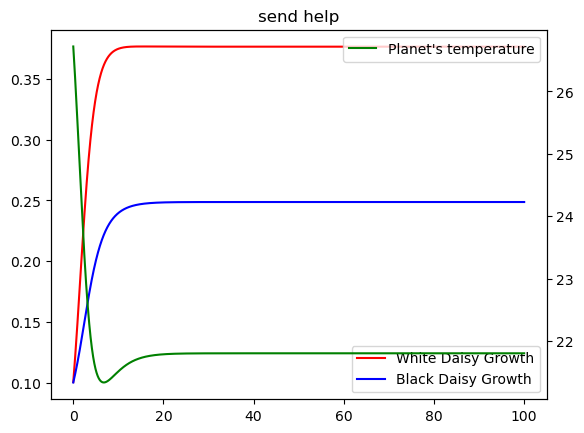

In [15]:
bdaisy = daisy('b', 0.1)
wdaisy = daisy('w', 0.1)
daisyworld = world(100,0.01, bdaisy, wdaisy, 'yes')
t_lst, temp_lst, bdaisy_cov_lst, wdaisy_cov_lst = daisyworld.run()
#Plotting
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(t_lst, wdaisy_cov_lst, color = 'r', label = 'White Daisy Growth')
ln2 = ax2.plot(t_lst, bdaisy_cov_lst, color = 'b', label = 'Black Daisy Growth')
ax3 = ax1.twinx()
ln3 = ax3.plot(t_lst, temp_lst, color = 'g', label = 'Planet\'s temperature')
plt.title("send help")
ax1.legend()
ax3.legend()
plt.show()

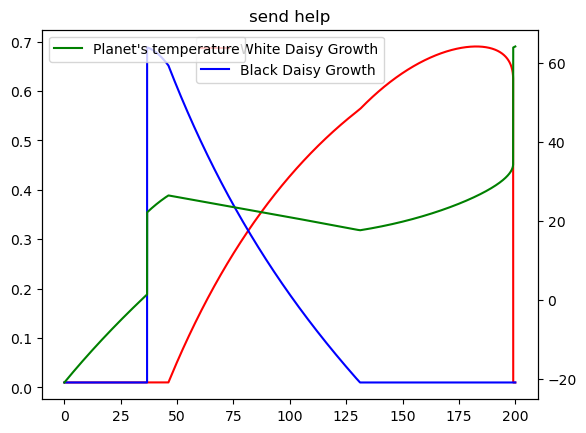

In [18]:
bdaisy = daisy('b', 0.1)
wdaisy = daisy('w', 0.1)
daisyworld = world(200,0.01, bdaisy, wdaisy, 'no')
t_lst2, temp_lst2, bdaisy_cov_lst2, wdaisy_cov_lst2 = daisyworld.run()
#Plotting
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(t_lst2, wdaisy_cov_lst2, color = 'r', label = 'White Daisy Growth')
ln2 = ax2.plot(t_lst2, bdaisy_cov_lst2, color = 'b', label = 'Black Daisy Growth')
ax3 = ax1.twinx()
ln3 = ax3.plot(t_lst2, temp_lst2, color = 'g', label = 'Planet\'s temperature')
plt.title("send help")
ax1.legend()
ax3.legend()
plt.show()

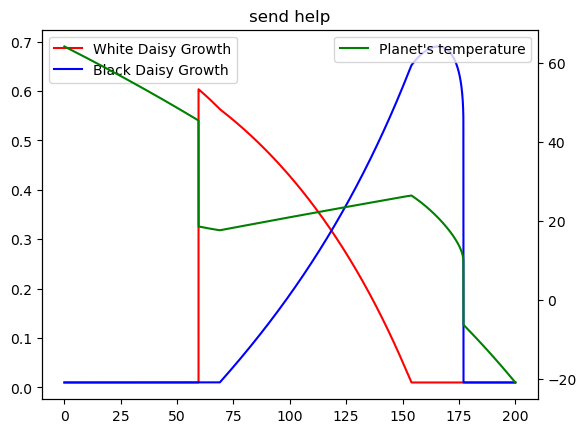

In [20]:
#This graph was cheesed
bdaisy = daisy('b', 0.1)
wdaisy = daisy('w', 0.1)
daisyworld = world(200,0.01, bdaisy, wdaisy, 'no')
t_lst3, temp_lst3, bdaisy_cov_lst3, wdaisy_cov_lst3 = daisyworld.run()
#Plotting
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(t_lst3, wdaisy_cov_lst3, color = 'r', label = 'White Daisy Growth')
ln2 = ax2.plot(t_lst3, bdaisy_cov_lst3, color = 'b', label = 'Black Daisy Growth')
ax3 = ax1.twinx()
ln3 = ax3.plot(t_lst3, temp_lst3, color = 'g', label = 'Planet\'s temperature')
plt.title("send help")
ax1.legend()
ax3.legend()
plt.show()

Text(0.5, 1.0, 'send help')

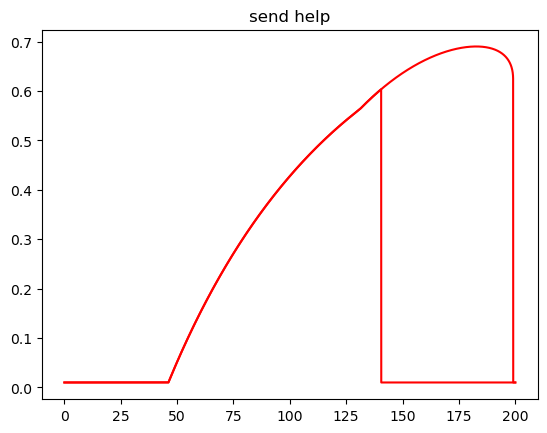

In [34]:
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(t_lst3, wdaisy_cov_lst3[::-1], color = 'r', label = 'White Daisy Growth')
ln3 = ax1.plot(t_lst2, wdaisy_cov_lst2, color = 'r', label = 'White Daisy Growth')
plt.title("send help")

Text(0.5, 1.0, 'send some help')

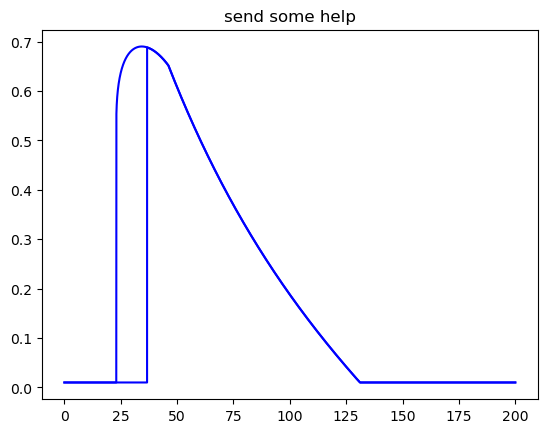

In [35]:
ax1 = plt.subplot()
ax2 = plt.subplot()
ln2 = ax2.plot(t_lst3, bdaisy_cov_lst3[::-1], color = 'b', label = 'Black Daisy Growth')
ln4 = ax2.plot(t_lst2, bdaisy_cov_lst2, color = 'b', label = 'Black Daisy Growth')
plt.title("send some help")

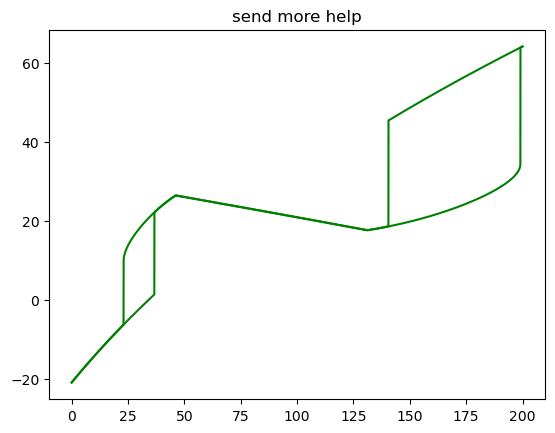

In [33]:
ax3 = plt.subplot()
ln5 = ax3.plot(t_lst3, temp_lst3[::-1], color = 'g', label = 'Planet\'s temperature')
ln6 = ax3.plot(t_lst2, temp_lst2, color = 'g', label = 'Planet\'s temperature')
plt.title("send more help")
ax1.legend()
plt.show()